In [35]:
!pip install plotly

In [36]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_csv('GOOG.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600
1,2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
2,2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700
3,2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200
4,2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300
...,...,...,...,...,...,...,...
248,2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600
249,2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400
250,2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400
251,2022-01-27,2627.219971,2652.198975,2578.899902,2582.419922,2582.419922,1512400


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [39]:
data.index = pd.to_datetime(data['Date'])
data = data.drop(['Date'], axis='columns')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300
...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400


La X consiste en variables como 'Abrir – Cerrar' y 'Alto – Bajo'. Estos pueden entenderse como indicadores en base a los cuales el algoritmo predecirá la tendencia del mañana.

In [40]:
# Create predictor variables
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600,10.430054,47.080078
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,-47.780030,71.461914
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700,-4.949951,41.270020
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200,2.929932,98.119995
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300,6.519776,35.960083
...,...,...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600,-86.889892,122.730957
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,34.000000,59.209961
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400,27.050049,113.079834


In [41]:
# Store all predictor variables in a variable X
X = data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-01-29,10.430054,47.080078
2021-02-01,-47.780030,71.461914
2021-02-02,-4.949951,41.270020
2021-02-03,2.929932,98.119995
2021-02-04,6.519776,35.960083


Y es un conjunto de datos objetivo que almacena la señal comercial correcta que el algoritmo de aprendizaje automático intentará predecir.
Si el precio de mañana es mayor que el precio de hoy, entonces compraremos la acción en particular, de lo contrario no tendremos posición en el. Almacenaremos +1 para una señal de compra y 0 para una posición de no en y

In [42]:
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

Dividiremos los datos en conjuntos de datos de entrenamiento y prueba.

In [43]:
split_percentage = 0.8
split = int(split_percentage*len(data))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

## MODELO DE CLÁSIFICADOR DE VECTORES DE SOPORTE (SVC)

Clasificador de vectores de soporte (SVC)

Creación del modelo clasificador utilizando el método fit() en el conjunto de datos de entrenamiento

Usaremos la función SVC() de la biblioteca sklearn.svm.SVC para crear nuestro modelo clasificador usando el método fit() en el conjunto de datos de entrenamiento.

In [44]:
from sklearn import svm
cls = svm.SVC(probability=True).fit(X_train, y_train)

In [45]:
def predict_model(model,X_test):
  y_pred = model.predict(X_test)
  return y_pred

## EVALUACIÓN DEL MODELO SVC

In [46]:
# REPORTE DE MÉTRICAS
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_model(cls,X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.41      1.00      0.58        21

    accuracy                           0.41        51
   macro avg       0.21      0.50      0.29        51
weighted avg       0.17      0.41      0.24        51



In [47]:
# MATRIZ DE CONFUSIÓN
def plot_confusion_matrix(model,X_test,y_test):
  from sklearn.metrics import confusion_matrix
  import plotly.express as px
  predict = predict_model(model,X_test)
  confusion_matrix = confusion_matrix(y_test, predict).astype(int)
  fig = px.imshow(confusion_matrix, text_auto=True)
  fig.show()

In [48]:
plot_confusion_matrix(cls,X_test,y_test)

In [49]:
def plot_bar_metricas_classification(model,X_test):
  from sklearn import metrics
  y_pred = predict_model(model,X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  sensivity = metrics.recall_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)

  # DATAFRAME DE MÉTRICAS
  metrics = {
    'metrics' : ['Exactitud', 'Precisión', 'Sensibilidad','F1-score'],
    'valor': [accuracy, precision, sensivity,f1_score]
  }
  metrics = pd.DataFrame(metrics)
  import plotly.express as px
  fig = px.bar(metrics, x="metrics", y="valor", color="metrics",text_auto=True,title="Métricas del modelo")
  fig.show()

In [50]:
# GRÁFICA DE LAS PRINCIPALES MÉTRICAS
plot_bar_metricas_classification(cls,X_test)

In [51]:
def plot_roc_curve(model,X_test,y_test):
  from sklearn.metrics import roc_curve, auc
  # svm
  predictions = model.predict_proba(X_test)
  predictions = predictions[:, 1]
  model_fpr, model_tpr, threshold = roc_curve(y_test, predictions)
  auc_model = auc(model_fpr, model_tpr)

  plt.figure(figsize=(5, 5), dpi=100)

  plt.plot(model_fpr, model_tpr, linestyle='-', label='Modelo (auc = %0.3f)' % auc_model)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  plt.legend()

  plt.show()

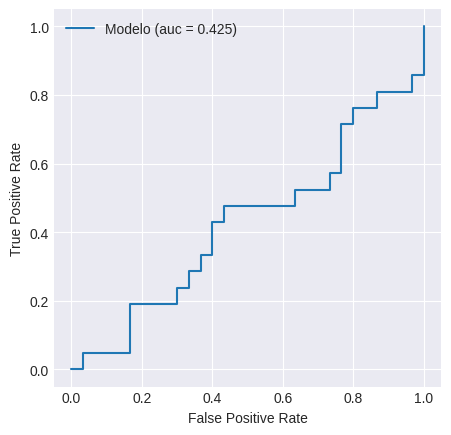

In [52]:
plot_roc_curve(cls,X_test,y_test)

## ESTRATEGIA DE LA IMPLEMENTACIÓN

In [53]:
data['Predicted_Signal'] = cls.predict(X)
data['Predicted_Signal']

Date
2021-01-29    1
2021-02-01    1
2021-02-02    1
2021-02-03    1
2021-02-04    1
             ..
2022-01-24    1
2022-01-25    1
2022-01-26    1
2022-01-27    1
2022-01-28    1
Name: Predicted_Signal, Length: 253, dtype: int64

In [54]:
conditionlist = [
    (data['Predicted_Signal'] == 1) ,
    (data['Predicted_Signal'] == 0)]
choicelist = ['Comprar','Vender']
data['Decision'] = np.select(conditionlist, choicelist)
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Decision
Date,,,,,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600,10.430054,47.080078,1,Comprar
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,-47.780030,71.461914,1,Comprar
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700,-4.949951,41.270020,1,Comprar
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200,2.929932,98.119995,1,Comprar
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300,6.519776,35.960083,1,Comprar
...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600,-86.889892,122.730957,1,Comprar
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,34.000000,59.209961,1,Comprar
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400,27.050049,113.079834,1,Comprar


Predeciremos la señal (comprar o vender) usando la función cls.predict().

Calcular devoluciones diarias

In [55]:
# Calculate daily returns
data['Return'] = data.Close.pct_change()
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Decision,Return
Date,,,,,,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600,10.430054,47.080078,1,Comprar,NaN
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,-47.780030,71.461914,1,Comprar,0.035740
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700,-4.949951,41.270020,1,Comprar,0.013759
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200,2.929932,98.119995,1,Comprar,0.073961
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300,6.519776,35.960083,1,Comprar,-0.003720
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600,-86.889892,122.730957,1,Comprar,0.002152
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,34.000000,59.209961,1,Comprar,-0.027893
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400,27.050049,113.079834,1,Comprar,0.019762


Calcular los rendimientos de la estrategia

In [56]:
data['Strategy_Return'] = data.Return*data.Predicted_Signal.shift(1)
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Decision,Return,Strategy_Return
Date,,,,,,,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600,10.430054,47.080078,1,Comprar,NaN,NaN
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,-47.780030,71.461914,1,Comprar,0.035740,0.035740
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700,-4.949951,41.270020,1,Comprar,0.013759,0.013759
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200,2.929932,98.119995,1,Comprar,0.073961,0.073961
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300,6.519776,35.960083,1,Comprar,-0.003720,-0.003720
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600,-86.889892,122.730957,1,Comprar,0.002152,0.002152
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,34.000000,59.209961,1,Comprar,-0.027893,-0.027893
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400,27.050049,113.079834,1,Comprar,0.019762,0.019762


Calcular rendimientos acumulativos

In [57]:
data['Cum_Ret'] = data['Return'].cumsum()
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Decision,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600,10.430054,47.080078,1,Comprar,NaN,NaN,NaN
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,-47.780030,71.461914,1,Comprar,0.035740,0.035740,0.035740
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700,-4.949951,41.270020,1,Comprar,0.013759,0.013759,0.049499
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200,2.929932,98.119995,1,Comprar,0.073961,0.073961,0.123460
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300,6.519776,35.960083,1,Comprar,-0.003720,-0.003720,0.119740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600,-86.889892,122.730957,1,Comprar,0.002152,0.002152,0.377318
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,34.000000,59.209961,1,Comprar,-0.027893,-0.027893,0.349425
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400,27.050049,113.079834,1,Comprar,0.019762,0.019762,0.369187


Calcular los rendimientos acumulativos de la estrategia

In [58]:
data['Cum_Strategy'] = data['Strategy_Return'].cumsum()
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Decision,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,
2021-01-29,1846.170044,1857.280029,1810.199951,1835.739990,1835.739990,1612600,10.430054,47.080078,1,Comprar,NaN,NaN,NaN,NaN
2021-02-01,1853.569946,1922.391968,1850.930054,1901.349976,1901.349976,1602200,-47.780030,71.461914,1,Comprar,0.035740,0.035740,0.035740,0.035740
2021-02-02,1922.560059,1955.760010,1914.489990,1927.510010,1927.510010,2273700,-4.949951,41.270020,1,Comprar,0.013759,0.013759,0.049499,0.049499
2021-02-03,2073.000000,2116.500000,2018.380005,2070.070068,2070.070068,4118200,2.929932,98.119995,1,Comprar,0.073961,0.073961,0.123460,0.123460
2021-02-04,2068.889893,2078.550049,2042.589966,2062.370117,2062.370117,1852300,6.519776,35.960083,1,Comprar,-0.003720,-0.003720,0.119740,0.119740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,2520.550049,2615.570068,2492.839111,2607.439941,2607.439941,2764600,-86.889892,122.730957,1,Comprar,0.002152,0.002152,0.377318,0.379357
2022-01-25,2568.709961,2586.770020,2527.560059,2534.709961,2534.709961,1800400,34.000000,59.209961,1,Comprar,-0.027893,-0.027893,0.349425,0.351464
2022-01-26,2611.850098,2656.149902,2543.070068,2584.800049,2584.800049,1979400,27.050049,113.079834,1,Comprar,0.019762,0.019762,0.369187,0.371225


### Retornos de la estrategia de trama vs rendimientos originales

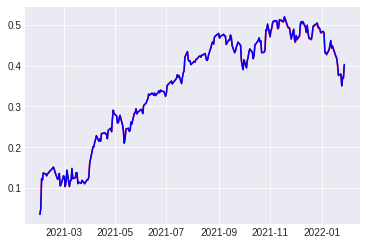

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(data['Cum_Ret'],color='red')
plt.plot(data['Cum_Strategy'],color='blue')

## MODELO DE CLASIFICACIÓN RANDOM FOREST

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=101,criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [61]:
rfc_pred = rfc.predict(X_test)

### PREDICCIÓN DEL MODELO RANDOM FOREST

In [62]:
# PREDICCIÓN DEL MODELO
predict_model(rfc,X_test)
predict_model_rfc = predict_model(rfc,X_test)

In [63]:
# REPORTE DE MÉTRICAS
plot_confusion_matrix(rfc,X_test,y_test)

In [64]:
plot_bar_metricas_classification(rfc,X_test)

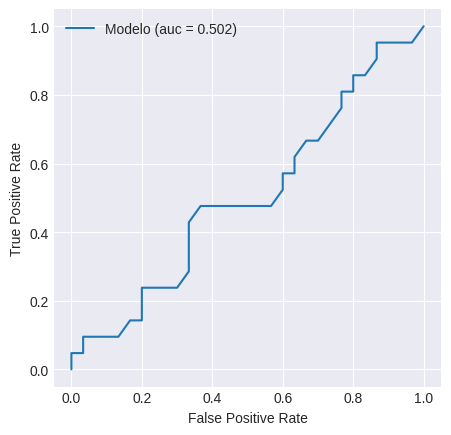

In [65]:
plot_roc_curve(rfc,X_test,y_test)

## COMPARACIÓN DE MODELOS

In [66]:
def plot_roc_curve_models(model,model2,X_test,y_test):
  
  from sklearn.metrics import roc_curve, auc
  # model
  predictions = model.predict_proba(X_test)
  predictions = predictions[:, 1]
  model_fpr, model_tpr, threshold = roc_curve(y_test, predictions)
  auc_model = auc(model_fpr, model_tpr)

  # model
  predictions2 = model2.predict_proba(X_test)
  predictions2 = predictions2[:, 1]
  model2_fpr, model2_tpr, threshold = roc_curve(y_test, predictions2)
  auc_model2 = auc(model2_fpr, model2_tpr)

  plt.figure(figsize=(5, 5), dpi=100)

  plt.plot(model_fpr, model_tpr, linestyle='-', label='Modelo svc (auc = %0.3f)' % auc_model)
  plt.plot(model2_fpr, model2_tpr, marker='.', label='Modelo rf (auc = %0.3f)' % auc_model2)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

  plt.legend()

  plt.show()

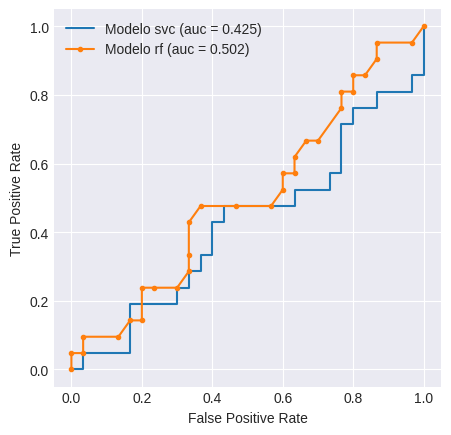

In [67]:
plot_roc_curve_models(cls,rfc,X_test,y_test)

## GRÁFICO DE VELAS

In [68]:
import plotly.graph_objects as go
candlestick = go.Candlestick(
                            x=data.index,
                            open=data['Open'],
                            high=data['High'],
                            low=data['Low'],
                            close=data['Close']
                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=800, height=600,
    title="GOOGLE",
    yaxis_title='Price Stock'
)

fig.show()